# Task1 A a) ImageJ   
Innstall ImageJ or Fiji (Links to an external site.)

Import the image fall.tif. The image can be found in the folder "Filer - Images".

Make first a copy of the original image (Edit - copy)

Find the pixel value in red, green and blue (RGB) for the pixels with the following coordinates (x,y):

(418, 356)

(550, 512)

(628, 844)

- What is the maximum and minimum value for each colour in the image ?\
   - ans-255, 0

- Is this an 8-bits RGB or 16-bits  RGB image ?\
   - ans-8 bit image RGB color

- Experiment by split the RGB channels through the menu Image - Color and converting the image to an 8-bits grey scale image (Image - type)

  - gray_scale image: image-type-8bit-
  - splitting the channels: image-color-split channels

# Task1 B

b) Python
Install Python (Anaconda) (Links to an external site.) with the scikit-image (Links to an external site.) package

Take a look at the examples and user guide for scikit -image.

Import the same image  fall.tif into Python and find the pixel values as above.

How many pixels are there in x and y of the image ? 

Extract the red, green and blue image.

Below are some Python commands that will help you (in the example the image name is lift.tif, in your case it will be fall.tif)

Import one of your own images and do some of the same exercises. 

In [29]:
from skimage.viewer import ImageViewer
import matplotlib.pyplot as plt
from skimage import io

In [30]:
def get_image(name):
    """ Using the skimage.io import the image with the file name.
    This function returns the gray image as numpy array """
    
    #Getting the image  
    #filename = '../Images/'+name
    filename = name
    image = io.imread(filename, as_gray = False) 

    return image

In [31]:
def show_image(image, label ="Image:", size=(6,2), cmap='viridis'):
    """This function shows/plots the given image."""
    plt.subplots(1,1,figsize=size)
    plt.title(label = label, fontsize=12)
    plt.imshow(image, cmap=cmap) 
    plt.show()

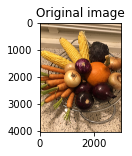

SHAPE (4032, 3024, 3)
size/No of pixels 36578304
RED max: 255
RED min: 3


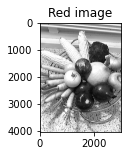

Green max: 255
Green min: 0


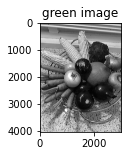

BLUE max: 255
BLUE min: 0


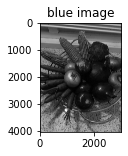

In [32]:
#reading image

fall = get_image('fall.jpeg')

# # display image
show_image(fall, label ="Original image", size=(6,2), cmap='gray')

# shape of image matrix
print("SHAPE", fall.shape)
print("size/No of pixels", fall.size)

#===================================================
print("=========================================")
# extracting one colour and finding min and max values
#structure of the image (X, Y, color), 0=red, 1=green, 2=blue
fall_red = fall[:,:,0] #

print("RED max:", max(fall_red.flatten()))
print("RED min:",min(fall_red.flatten()))

show_image(fall_red, label ="Red image", size=(6,2), cmap='gray')


#===================================================
print("=========================================")
# extracting one colour and finding min and max values
#structure of the image (X, Y, color), 0=red, 1=green, 2=blue
fall_green = fall[:,:,1] #

print("Green max:", max(fall_green.flatten()))
print("Green min:",min(fall_green.flatten()))

show_image(fall_green, label ="green image", size=(6,2), cmap='gray')

#===================================================
print("=========================================")
# extracting one colour and finding min and max values
#structure of the image (X, Y, color), 0=red, 1=green, 2=blue
fall_blue = fall[:,:,2] #

print("BLUE max:", max(fall_blue.flatten()))
print("BLUE min:",min(fall_blue.flatten()))


show_image(fall_blue, label ="blue image", size=(6,2), cmap='gray')


# Task2
Compression with loss.
We will do a small analysis of the image feep.ascii.pgm after saving it as  JPEG and TIFF.
Start  ImageJ and set the jpeg quality to 60% by going  "Edit/Options/InputOutput". Quit ImageJ and restart. 

Download feep.ascii.pgm and save the image as  JPEG and as TIFF. Keep all the images (tif, jpeg and pgm ) open. 

Zoom in and a look at the differences in quality. You can also compute the differences with Image Calculator "Process/Image Calculator" and subtract the PGM and JPEG images. Let the result be a 32 bits image which allows negative value.  Do the same with PGM and TIFF. What do you expect to see ?

# Exercise 3

Look at the scikit-image page about numpy indexering of arrays

http://scikit-image.org/docs/dev/user_guide/numpy_images.html#numpy-indexing (Links to an external site.)

Import the image fiat.jpg in python.

Carry out the following:

- Find the maximum, minimum and mean value of the red image
- Find the shape of the full colour image
- Set the pixel on thee 5th row and the 3rd columns to white
- Create a mask that frames the car, it can be square, triangle or round like the one below:  

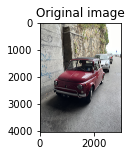

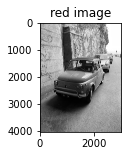

SHAPE (4032, 3024)
size/No of pixels 12192768
MIN 0
MAX 255
Mean 134.88342958711263


In [33]:
car_image = get_image('fiat.jpg')

# # display image
show_image(car_image, label ="Original image", size=(6,2), cmap='gray')


#making the image red
red_image = car_image[:,:,0] # #structure of the image (X, Y, color), 0=red, 1=green, 2=blue
show_image(red_image, label ="red image", size=(6,2), cmap='gray')


# shape of image matrix
print("SHAPE",red_image.shape)
print("size/No of pixels",red_image.size)
print("===========================")

#crating the flatten array
red_array = np.array(red_image.flatten())


#finding the max-min from the array
print("MIN", red_array.min())
print("MAX", red_array.max())
print("Mean", red_array.mean())
print("===========================")


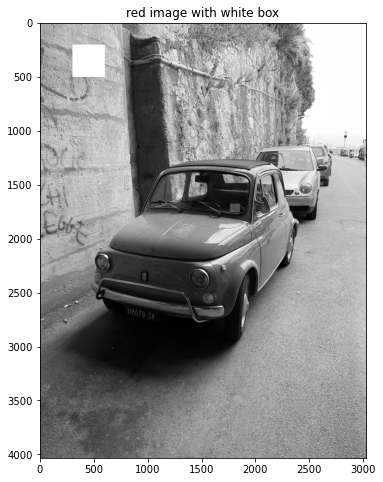

In [34]:
#red_image[5, 3] = 255 #Set the pixel on thee 5th row and the 3rd columns to white

red_image[200:500, 300:600] = 255 #Set the pixel of a rectangle  to white

# display image
show_image(red_image, label ="red image with white box", size=(16,8), cmap='gray')

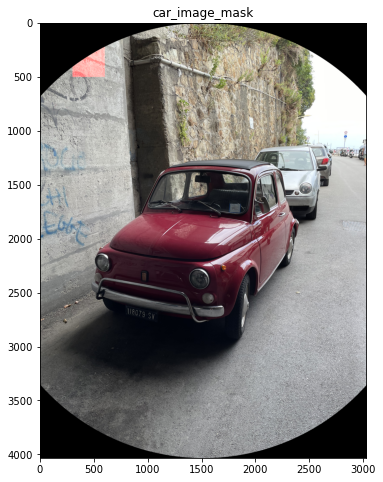

In [35]:
#Making the Mask
car_image_mask = car_image[:,:]*1
nrows, ncols = car_image_mask.shape[0], car_image_mask.shape[1]
row, col = np.ogrid[:nrows, :ncols]
cnt_row, cnt_col = nrows / 2, ncols / 2
outer_disk_mask = ((row - cnt_row)**2 + (col - cnt_col)**2 >(nrows / 2)**2)
car_image_mask[outer_disk_mask] = 0

# display image
show_image(car_image_mask, label ="car_image_mask", size=(16,8))

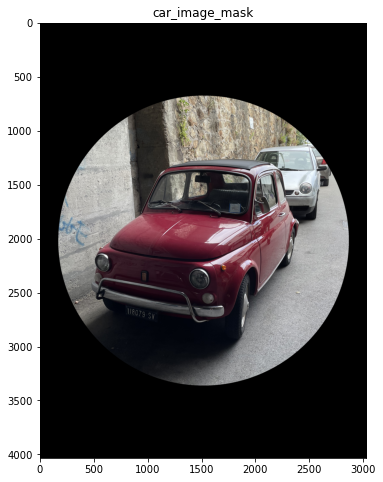

In [37]:
#Making the Mask-CORRECT
car_image_mask = car_image[:,:]*1
nrows, ncols = car_image_mask.shape[0], car_image_mask.shape[1]
row, col = np.ogrid[:nrows, :ncols]
cnt_row, cnt_col = nrows / 2, ncols / 2
outer_disk_mask = ((row - cnt_row)**2 + (col - cnt_col)**2 >(nrows/3)**2)
car_image_mask[outer_disk_mask] = 0

# display image
show_image(car_image_mask, label ="car_image_mask", size=(16,8))